In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix,recall_score, precision_score, f1_score

In [16]:
# col_names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
# pima=pd.read_csv("diabetes.csv",header=None,names=col_names)
pima = pd.read_csv("diabetes.csv")

In [17]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
feature_cols=['Glucose','BloodPressure','Insulin','Age']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [20]:
cfl = DecisionTreeClassifier()
cfl = cfl.fit(X_train, y_train)
y_pred = cfl.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
# print("Classification Report\n", classification_report(y_test, y_pred))
print("recall_score", recall_score(y_test, y_pred))
print("precision_score", precision_score(y_test, y_pred))
print("f1_score", f1_score(y_test, y_pred))

Accuracy 0.70995670995671
recall_score 0.6
precision_score 0.6071428571428571
f1_score 0.6035502958579881


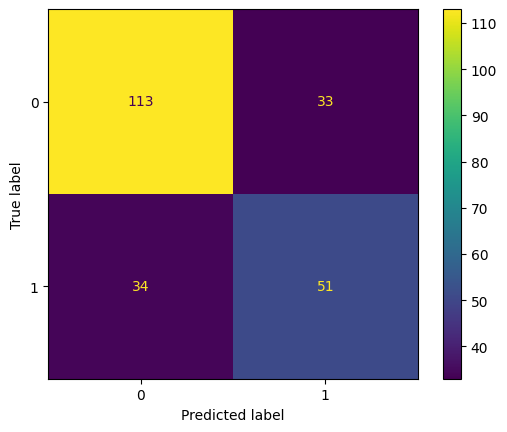

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
Outcome=["0","1"]
cm=confusion_matrix(y_test,y_pred)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Outcome)
display.plot()


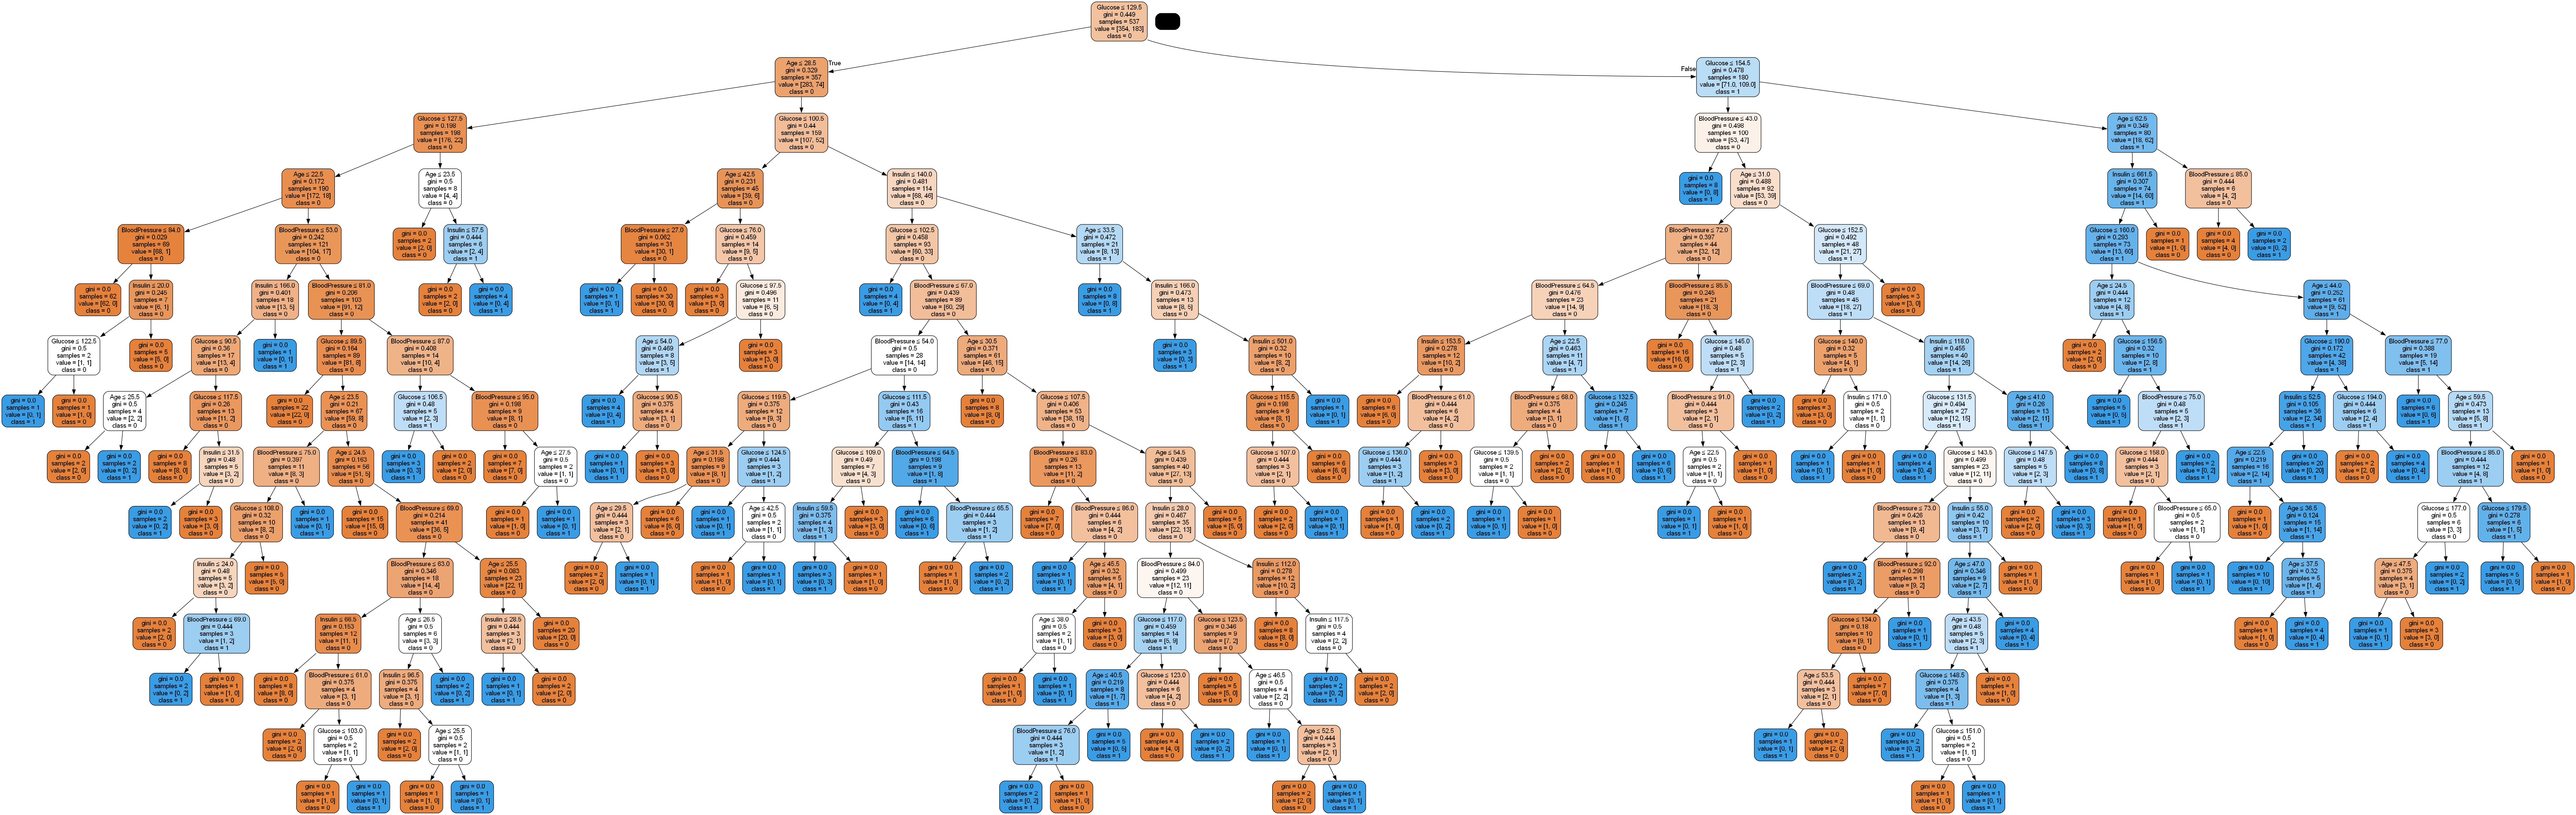

In [22]:
# %pip install six

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(cfl, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())


In [23]:
from sklearn import metrics

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7662337662337663


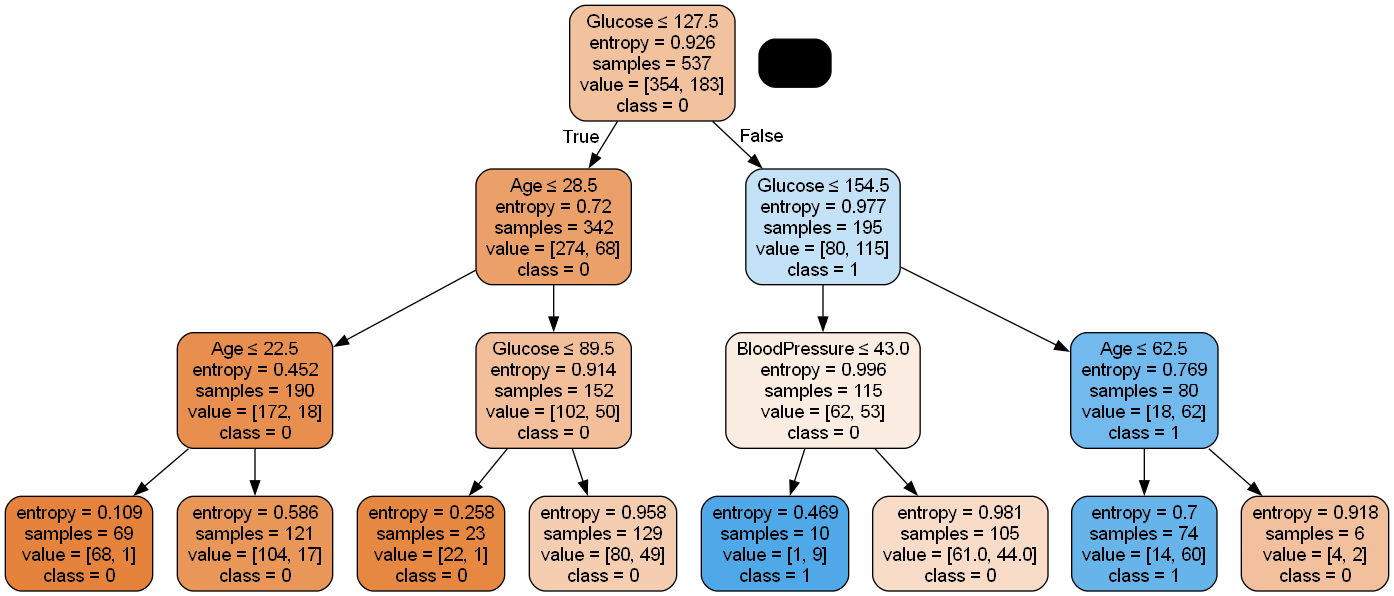

In [24]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())